# Module Importation

In [1]:
!pip install Ipython 

In [1]:
import numpy as np 
import gym 
import random 
import time 
from IPython.display import clear_output
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
from gym.envs.toy_text.frozen_lake import generate_random_map

# Creating Frozent Lake Environmment

In [2]:
environment = gym.make('FrozenLake-v1', render_mode='rgb_array')
# environment.reset()
# environment.render()

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]

# Initializing  variable 

In [4]:
# initializaing the action and state space present in the frozenlake environment.. 
size_action_space  = environment.action_space.n  
size_state_space = environment.observation_space.n

print(f'Possible Agent Actions : {size_action_space}')
print(f'Possible State in Frozen Lake Environment : {size_action_space}')


# creating the Q_table 
Q_table = np.zeros((size_state_space , size_action_space))
print('\n======= Q LOOK UP TABLE ============')
print(Q_table)
print('======= Q END ============')

Possible Agent Actions : 4
Possible State in Frozen Lake Environment : 4

======= Q LOOK UP TABLE ============
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
======= Q END ============


# Setting Training Parameter

In [19]:
episodes_count = 10000
maximum_step_per_episode = 100

learn_rate = 0.01
discount_rate =  0.99

explor_rate = 1
max_explor_rate = 1 
min_explor_rate = 0.01
explor_decay_rate = 0.001

# Q-Learning Algorithm for frozen lake problem

# Q-Agent Training for 10000 episode

In [20]:
all_episodes_reward_holder = []
exploration_rate_data = []
decay_rate_data = []



# the Q-learining algorithm
for episode in range(episodes_count): 
    environment.reset()
#     print(environment.reset())
    init_state = 0 
    
    finish = False
    current_episode_reward = 0
    
    for move in range(maximum_step_per_episode): 
        
#         the Exploration-exploitation decision making... 
        explor_rate_threshold = random.uniform(0, 1)
        
        if explor_rate_threshold > explor_rate:
#             fetching max queue value for the state... 
#             exploite
            action = np.argmax(Q_table[init_state, :])
        else: 
#           eplore.......
            action = environment.action_space.sample()
        
        
#         print(action, ' ', init_state[0])
        new_state, state_reward, finish, trunc, info = environment.step(action)
        
        
#         Updating the Q-table for the the state, action pair thus, Q(S,a)
        Q_table[init_state, action] = Q_table[init_state, action] * (1-learn_rate) + learn_rate * (state_reward+discount_rate*np.max(Q_table[new_state, :]))
        
        

        
        
        init_state = new_state
        current_episode_reward += state_reward
        
        if finish  == True: 
            break
        
#      decaying the exploration rate... 
    explor_rate = min_explor_rate + (max_explor_rate - min_explor_rate) * np.exp(-explor_decay_rate*episode)
    all_episodes_reward_holder.append(current_episode_reward)
    exploration_rate_data.append(explor_rate)

#    calculating and printing the average reward in very thounsand episodes
#     print(np.split(np.array(all_episodes_reward_holder), (episodes_count/1000)) )

reward_for_each_episodes = np.split(np.array(all_episodes_reward_holder), episodes_count/1000)
decay_for_each_episodes = np.split(np.array(exploration_rate_data), episodes_count/1000)
count = 1000
    
print('===================  AVG REWARD IN THIS EPISIODES ===================\n')
for wrd in reward_for_each_episodes:
    print(f'{count} : {sum(wrd/1000)}')
    count += 1000
    
# updated value of the Q table 
print('================ Q Table ================\n')
print(Q_table)



===================  AVG REWARD IN THIS EPISIODES ===================

1000 : 0.05200000000000004
2000 : 0.20800000000000016
3000 : 0.4260000000000003
4000 : 0.5660000000000004
5000 : 0.5940000000000004
6000 : 0.6810000000000005
7000 : 0.6790000000000005
8000 : 0.6870000000000005
9000 : 0.6890000000000005
10000 : 0.6700000000000005
================ Q Table ================

[[0.516388   0.49997969 0.49185507 0.49884593]
 [0.24179452 0.24566207 0.23063751 0.43792567]
 [0.3648904  0.25656228 0.25365121 0.280015  ]
 [0.11708839 0.13428281 0.09820198 0.26025559]
 [0.53351517 0.35069231 0.37668017 0.36689936]
 [0.         0.         0.         0.        ]
 [0.2564027  0.18180224 0.3158653  0.09605764]
 [0.         0.         0.         0.        ]
 [0.35758837 0.39918579 0.3456469  0.56449003]
 [0.38953361 0.60553986 0.4020122  0.37486772]
 [0.57642421 0.41884233 0.37470404 0.25621196]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.4110381 

In [21]:
# decay_count = 1000
# decay_diction = {}
# for decay in  decay_for_each_episodes: 
#     decay_diction[decay] = sum(wrd/1000)
#     decay_count += 1000
    

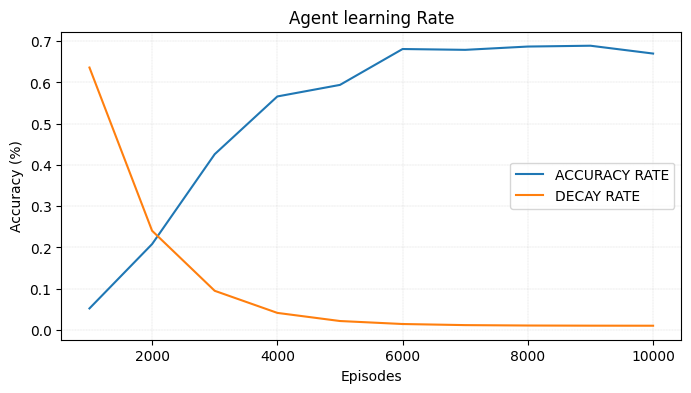

In [22]:
import matplotlib.pyplot as plt

visual_diction = {}
count = 1000
for wrd in reward_for_each_episodes:
#     print(wrd)
    visual_diction[count] = sum(wrd/1000)
    count += 1000

    
decay_count = 1000
decay_diction = {}
for decay in  decay_for_each_episodes: 
    decay_diction[decay_count] = sum(decay/1000)
    decay_count += 1000

    

def visualize_training_sequence(diction):
    plt.figure(figsize=(8,4))
    plt.plot(diction.keys() , diction.values() , label='ACCURACY RATE')
    plt.plot(decay_diction.keys(), decay_diction.values(), label='DECAY RATE')
    plt.title('Agent learning Rate')
    plt.xlabel('Episodes')
    plt.legend()
    plt.ylabel('Accuracy (%)')
    plt.grid(color='gray', linestyle=':', linewidth=0.2)
    plt.show()
    
    
visualize_training_sequence(visual_diction)
    

# Q-Agent Evaluation (Playing)

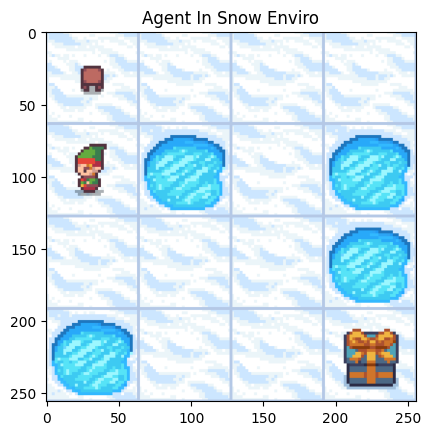

In [ ]:
# plaing for just three episode 
for episode in range(3):
    
    environment.reset()
    envi_state = 0
#     print(envi_state)
    finish = False
    
    print(f'============= EPISODE{episode +1} ===================\n\n\n\n')
    time.sleep(1)
    
#     looping throught 100 step in each episode.. 
    for move in range(maximum_step_per_episode):
        
#         resting the consolde and agent enviroment 
        clear_output(wait=True)
        plt.imshow(environment.render())
        display.display(plt.gcf())
        time.sleep(0.05)
        
#        selecting the best action from the Q_table 
        action = np.argmax(Q_table[envi_state, : ])
        new_state, state_reward, finish, trunc, info = environment.step(action)
        
#       if this condition is true is either the agent reach goal of fell into ice hole
        if finish: 
            clear_output(wait=True)
            plt.imshow(environment.render())
            plt.title('Agent In Snow Enviro')
            display.display(plt.gcf())
            
            
            if state_reward ==  1: 
                print(f'================ Final Goal Achieved !!! =================')
                time.sleep(3)
            else: 
                print(f'================= Falling Into the Ice Hole !!! ============')
                time.sleep(3)
            
                
            clear_output(wait=True)
            break
            
        envi_state = new_state
        
        
environment.close()